In [1]:
import pandas as pd
from pathlib import Path

# Basis ist das aktuelle Arbeitsverzeichnis (da, wo das Notebook liegt)
BASE_DIR = Path().resolve()

data_path = BASE_DIR / "data" / "preprocessed_full_dataset.csv"

df = pd.read_csv(data_path)

df.head()




,bank_account_uuid,amount,amount_mean_5,amount_std_5,amount_change,time_since_last_tx,day_of_month,median_day_of_month_per_series,dom_deviation,partner_tx_count,is_first_tx,day_of_week,valid_ref,target,set,transformed_index,original_index
0,F08F1EE7DBA14D5B84E6C07F7DFFABB7,26745.70,26745.70,0.0,0.0,30.0,2,2.0,0.0,1,1,0,1,0,train,0,35749
1,35A2C1CD3440419C8A9E7E048C1A3595,74265.81,74265.81,0.0,0.0,30.0,4,4.0,0.0,1,1,2,1,0,train,1,19949
2,F57BC18785894D178835D0471F6A6610,63916.47,63916.47,0.0,0.0,30.0,5,5.0,0.0,1,1,3,0,0,train,2,13266
3,81074A2ADC99429697190A5C16C171A6,18874.45,18874.45,0.0,0.0,30.0,5,5.0,0.0,1,1,3,1,0,train,3,28190
4,41A8D30AAB844DA9B1D1E9A7B195AB89,18609.81,18609.81,0.0,0.0,30.0,6,6.0,0.0,1,1,4,1,0,train,4,7543


In [2]:
df.shape


(38676, 17)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38676 entries, 0 to 38675
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bank_account_uuid               38676 non-null  object 
 1   amount                          38676 non-null  float64
 2   amount_mean_5                   38676 non-null  float64
 3   amount_std_5                    38676 non-null  float64
 4   amount_change                   38676 non-null  float64
 5   time_since_last_tx              38676 non-null  float64
 6   day_of_month                    38676 non-null  int64  
 7   median_day_of_month_per_series  38676 non-null  float64
 8   dom_deviation                   38676 non-null  float64
 9   partner_tx_count                38676 non-null  int64  
 10  is_first_tx                     38676 non-null  int64  
 11  day_of_week                     38676 non-null  int64  
 12  valid_ref                       

In [4]:
df.isna().sum()


bank_account_uuid                 0
amount                            0
amount_mean_5                     0
amount_std_5                      0
amount_change                     0
time_since_last_tx                0
day_of_month                      0
median_day_of_month_per_series    0
dom_deviation                     0
partner_tx_count                  0
is_first_tx                       0
day_of_week                       0
valid_ref                         0
target                            0
set                               0
transformed_index                 0
original_index                    0
dtype: int64

In [5]:
# Wie viele Zeilen pro Split?
df['set'].value_counts()


set
train    30940
test      7736
Name: count, dtype: int64

In [27]:
# Target-Verteilung insgesamt
df['target'].value_counts()


target
0    38636
1       40
Name: count, dtype: int64

In [7]:
# Nur numerische Spalten
num_cols = df.select_dtypes(include='number').columns.tolist()

df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
amount,38676.0,29082.062505,102592.384248,-3481.890,1436.742500,3278.195000,9875.837500,2.728142e+06
amount_mean_5,38676.0,28697.396554,79165.479689,63.944,2132.242500,3976.720000,8099.177000,1.648735e+06
amount_std_5,38676.0,16587.023774,66553.209490,0.000,469.392146,1544.528663,4864.871278,1.452903e+06
amount_change,38676.0,150.768586,100707.216057,-2724065.380,-971.855000,0.000000,1080.070000,2.662323e+06
time_since_last_tx,38676.0,30.976885,38.508895,6.000,29.000000,30.000000,32.000000,3.974000e+03
day_of_month,38676.0,15.005456,8.892285,1.000,7.000000,15.000000,22.000000,3.100000e+01
median_day_of_month_per_series,38676.0,14.179310,8.152510,1.000,6.000000,15.000000,21.000000,2.900000e+01
dom_deviation,38676.0,3.107353,6.793417,0.000,0.000000,1.000000,2.000000,2.900000e+01
partner_tx_count,38676.0,68.371316,44.829785,1.000,29.000000,68.000000,106.000000,2.880000e+02
is_first_tx,38676.0,0.071336,0.257389,0.000,0.000000,0.000000,0.000000,1.000000e+00


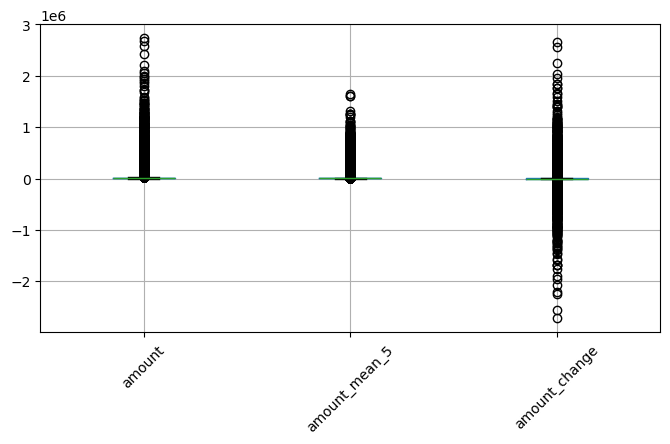

In [8]:
import matplotlib.pyplot as plt

df.boxplot(column=['amount', 'amount_mean_5', 'amount_change'], figsize=(8,4))
plt.xticks(rotation=45)
plt.show()


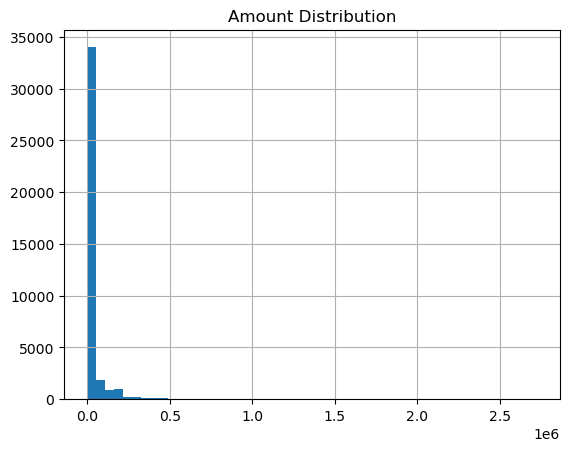

In [9]:
df['amount'].hist(bins=50)
plt.title("Amount Distribution")
plt.show()


In [10]:
df['time_since_last_tx'].describe()



count    38676.000000
mean        30.976885
std         38.508895
min          6.000000
25%         29.000000
50%         30.000000
75%         32.000000
max       3974.000000
Name: time_since_last_tx, dtype: float64

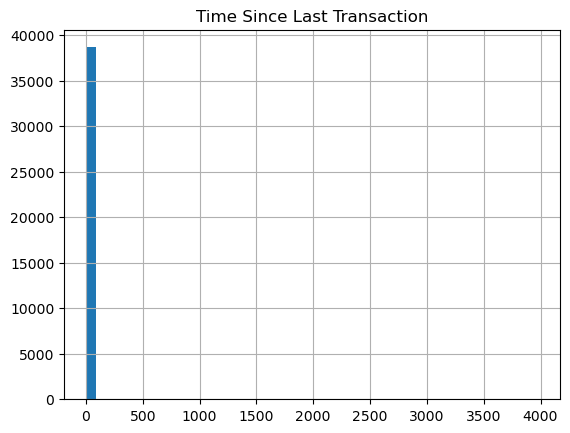

In [11]:
df['time_since_last_tx'].hist(bins=50)
plt.title("Time Since Last Transaction")
plt.show()


In [12]:
df['dom_deviation'].describe()



count    38676.000000
mean         3.107353
std          6.793417
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         29.000000
Name: dom_deviation, dtype: float64

df['dom_deviation'].hist(bins=31)
plt.title("Deviation from typical day-of-month")
plt.show()


In [13]:
df['valid_ref'].value_counts(normalize=True)


valid_ref
1    0.989528
0    0.010472
Name: proportion, dtype: float64

In [14]:
df.groupby('target')['valid_ref'].mean()


target
0    0.990035
1    0.500000
Name: valid_ref, dtype: float64

In [15]:
train_df = df[df['set'] == 'train'].copy()
test_df  = df[df['set'] == 'test'].copy()

train_df.shape, test_df.shape


((30940, 17), (7736, 17))

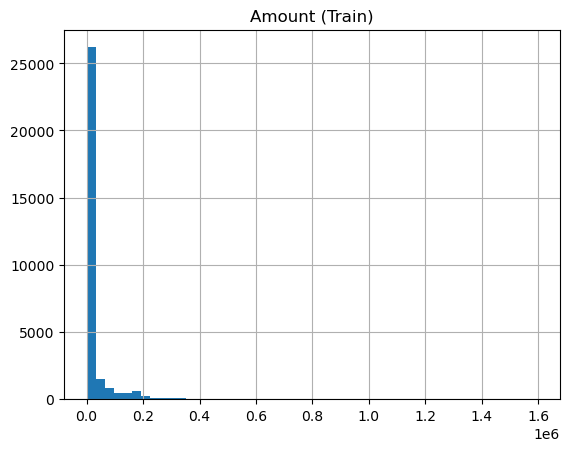

In [17]:
train_df['amount'].hist(bins=50)
plt.title("Amount (Train)")
plt.show()


In [18]:
original_path = BASE_DIR / "data" / "original_data.csv"
df_original = pd.read_csv(original_path, index_col=0)

df_original.head()


,bank_account_uuid,business_partner_name,date_post,amount,currency,ref_name,ref_iban,ref_swift,ref_bank,paym_note,trns_type,pay_method,channel,anomaly_description
0,41A8D30AAB844DA9B1D1E9A7B195AB89,Gordon Ltd,20160306,54527.13,USD,Porter LLC,GB19FFJT41296248500506,VELTGBJQ64J,ER,Legal Fees - PO#6648,DEBIT,WIRE,ONLINE_BANKING_PORTAL,NaN
1,35A2C1CD3440419C8A9E7E048C1A3595,Morris LLC,20150421,3422.79,USD,Ford Inc Logistics,GB74NFNU67687789423064,KCWSGBRX59R,MT,Inv. #INV-2015-03-5021 (Term 30d),DEBIT,WIRE,ONLINE_BANKING_PORTAL,NaN
2,A66379F952D14BC3B3D3803A4BE02E4F,Hogan Inc,20190304,2774.15,USD,Williams Ltd Logistics,GB45MVXW61169881089871,LHNXGBR6CBI,SG,Invoice #INV-2019-02-1939 (Term 15d),DEBIT,WIRE,ONLINE_BANKING_PORTAL,NaN
3,E32418792C374C9A959BB5B4FA77C2E8,Richmond-Reid,20210510,805.55,USD,Smith-Padilla Logistics,GB45NVMQ76275429832162,PFGJGBYJKDK,PY,Payment for INV-2021-03-2777 (Term 45d),DEBIT,WIRE,ONLINE_BANKING_PORTAL,NaN
4,C3F709F98BB443BD830A96F7FA6315F7,Logan Group,20140904,1647.38,USD,Wong and Sons Logistics,GB17AQEO29042187888910,GJVLGBXPE7W,PT,Inv. #INV-2014-08-2226 (Term 15d),DEBIT,WIRE,ONLINE_BANKING_PORTAL,NaN


In [29]:
# Anomalien im Train
anomalies_train = train_df[train_df['target'] == 1].head(50)
anomalies_train[[
    "amount",
    "amount_mean_5",
    "amount_std_5",
    "amount_change",
    "time_since_last_tx",
    "day_of_month",
    "median_day_of_month_per_series",
    "dom_deviation",
    "partner_tx_count",
    "is_first_tx",
    "day_of_week",
    "valid_ref",
    "target",
    "set",
    "transformed_index",
    "original_index"
]]
#alle spalten anzeigen lassen

,amount,amount_mean_5,amount_std_5,amount_change,time_since_last_tx,day_of_month,median_day_of_month_per_series,dom_deviation,partner_tx_count,is_first_tx,day_of_week,valid_ref,target,set,transformed_index,original_index
129,58237.35,58237.350000,0.000000,0.00,30.0,15,17.0,2.0,1,1,2,0,1,train,129,19506
732,145174.69,155970.083333,10054.546631,-19892.89,39.0,27,17.0,10.0,3,0,4,1,1,train,732,11834
915,55885.43,55917.535000,454.824067,0.00,12.0,19,5.0,14.0,4,0,5,1,1,train,915,5004
1440,105982.09,100077.392000,5824.331788,0.00,16.0,18,3.0,15.0,7,0,2,1,1,train,1440,13217
1596,88012.09,88012.090000,0.000000,0.00,30.0,6,6.0,0.0,1,1,0,0,1,train,1596,24160
3680,137598.53,126479.572000,11957.749047,0.00,8.0,26,17.0,9.0,16,0,1,1,1,train,3680,12799
4929,90758.46,98843.482000,12691.513113,0.00,15.0,17,2.0,15.0,20,0,5,1,1,train,4929,12052
6392,426028.32,218509.452000,121332.722865,294127.99,30.0,30,3.0,27.0,24,0,3,1,1,train,6392,33568
7368,171040.67,178820.192000,15844.342484,0.00,13.0,19,6.0,13.0,29,0,0,1,1,train,7368,3258
8451,78845.75,84216.904000,7284.923262,0.00,13.0,17,3.0,14.0,34,0,2,1,1,train,8451,33881


In [30]:
orig_rows = df_original.loc[anomalies_train['original_index']]
orig_rows.head(50)


,bank_account_uuid,business_partner_name,date_post,amount,currency,ref_name,ref_iban,ref_swift,ref_bank,paym_note,trns_type,pay_method,channel,anomaly_description
19506,D74EFC00F751432D8E500A2C75579113,Bullock-Parker,20120215,58237.35,USD,Diaz PLC Solutions,GB30DPFI67523870371084,DLPPGB1FKTK,PH,Invoice #INV-2012-01-3812 (Term 45d),DEBIT,ACH,API,IBAN_MISMATCH_ANOMALY: IBAN changed from GB57R...
11834,3ADB30548EE546FD9B93696EE343E628,Arnold-Lee,20120427,145174.69,USD,Clark-Dominguez Solutions,GB41NIKL19094554371869,NLOVGBCDXXL,PA,Invoice #INV-2012-03-3361 (Term 45d),DEBIT,ACH,API,TIMING_ANOMALY: Payment date shifted from day ...
5004,B8BE86033C6F4AAA9E22380407744E9A,Steele LLC,20120519,55885.43,USD,Perkins-Woods Solutions,GB87XDEQ39318665629686,BTXGGBDXSV3,SR,REPAYMENT-URGENT,DEBIT,ACH,API,FREQUENCY_ANOMALY: Duplicate monthly payment
13217,E32418792C374C9A959BB5B4FA77C2E8,Richmond-Reid,20120718,105982.09,USD,Ramsey PLC Solutions,GB21ICSE44201631367006,IGCSGBG8QG3,LS,REPAYMENT-URGENT,DEBIT,ACH,API,FREQUENCY_ANOMALY: Duplicate monthly payment
24160,B6AAF2F311CE4FD09DF9149B5438BBDA,Mendoza-Spencer,20120806,88012.09,USD,Pearson-Guzman Systems,GB35BCUX43626063367167,EHADGBGVA0F,BR,Invoice #INV-2012-06-2057 (Term 60d),DEBIT,ACH,API,SUBTLE_PAYEE_MISMATCH: Payee changed from 'Pea...
12799,83269DE6C6EF4619A95C4C9E645D7E48,Bennett-Burke,20130326,137598.53,USD,Pena-Perez Solutions,GB66ATHP69589748409360,IDJIGBD881M,CY,REPAYMENT-URGENT,DEBIT,ACH,API,FREQUENCY_ANOMALY: Duplicate monthly payment
12052,C8FD20CF713D4407948BDFEB54EDF1C7,Robbins Ltd,20130817,90758.46,USD,Alvarez-Robbins Solutions,GB51ISYH51787953455144,HCLCGBCDREW,KR,REPAYMENT-URGENT,DEBIT,ACH,API,FREQUENCY_ANOMALY: Duplicate monthly payment
33568,35A2C1CD3440419C8A9E7E048C1A3595,Morris LLC,20140130,426028.32,USD,Turner LLC Solutions,GB91BQRI06018065728444,YNDIGBO11EK,PT,Invoice #INV-2013-12-2400 (Term 60d),DEBIT,ACH,API,AMOUNT_ANOMALY: Amount changed from ~236682
3258,2537E55BD42F447195FCA95FCF956572,Garcia-Baxter,20140519,171040.67,USD,Hart LLC Solutions,GB54IMRJ09847443914139,NCOLGBBIBDR,VC,REPAYMENT-URGENT,DEBIT,ACH,API,FREQUENCY_ANOMALY: Duplicate monthly payment
33881,E32418792C374C9A959BB5B4FA77C2E8,Richmond-Reid,20140917,78845.75,USD,Ramsey PLC Solutions,GB21ICSE44201631367006,IGCSGBG8QG3,TJ,REPAYMENT-URGENT,DEBIT,ACH,API,FREQUENCY_ANOMALY: Duplicate monthly payment


In [21]:
for col in ['amount', 'amount_mean_5', 'time_since_last_tx', 'dom_deviation']:
    print(f"\n=== {col} ===")
    print(df.groupby('target')[col].describe()[['mean', 'std', 'min', 'max']])



=== amount ===
                 mean            std       min         max
target                                                    
0        28841.810576  102001.893565  -3481.89  2728141.64
1       261141.401250  274200.463646  13097.98  1114389.49

=== amount_mean_5 ===
                 mean            std        min          max
target                                                      
0        28509.175900   78794.310361     63.944  1648735.202
1       210499.726275  174855.114521  55917.535   886590.344

=== time_since_last_tx ===
              mean         std  min     max
target                                     
0        30.867093   35.954607  6.0  3974.0
1       137.025000  422.369050  8.0  2222.0

=== dom_deviation ===
           mean       std  min   max
target                              
0       3.10322  6.791726  0.0  29.0
1       7.10000  7.330302  0.0  28.0
